# Вітаю на фінальному проєкті!
Протягом курсу ми навчились завантажувати дані в Python, трансформувати їх, чистити, агрегувати, знаходити з допомогою даних відповіді на наші питання. 
Задача фінального проєкту - продемонструвати той рівень роботи з даними, на якому ви є зараз. 

Цей ноутбук буде присвячений аналізу даних з файла `Grocery DataBase.xlsx`, який є в папці `Дані` на Диску. Так, це Excel файл, але ми можемо дуже просто завантажувати дані з нього у Python. Покажу пару команд для роботи з Excel файлом.

Для початку встановимо бібліотеку, яка потрібна для роботи з Excel файлами з pandas. Можна встановити тут, або в терміналі, але якщо Ви встановлюєте в терміналі, то після того треба перезапустити ядро (Kernel) ноутбуку, аби бібліотека точно підтягнулась. Іноді підтягується і без того, але це на випадок, що робити, якщо компілятор каже, що її не бачить.

In [1]:
!pip install openpyxl

In [70]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Ось так можемо переглянути, які є листки в Excel файлі:

In [3]:
# замініть на шлях до файлу на своєму комп`ютері
path_to_file = '../data/Grocery Database.xlsx'
###Grocery Database.xlsx

In [4]:
xl = pd.ExcelFile(path_to_file)
xl.sheet_names

['Grosto DB', 'Sheet2', 'Fact Summary']

А так можемо зчитати конкретний листок:

In [5]:
xl.parse('Fact Summary')

,S.No.,Column Name,Description of the Column names
0,1,Receipt Number,Transaction Number
1,2,Date,Date of Transaction
2,3,Year,Year of Transaction
3,4,Month,Month of Transaction
4,5,Time,Time of the transaction
5,6,Mobile Number,Monbile number of the customer
6,7,Membership ID,Unique Membership ID of the Customer
7,8,Loyalty Card Points,Loyalty Points earned by customer (10 Points/1...
8,9,Age,Age of the Customer in the Company Database
9,10,Gender,Gender of the customer


Читати дані можна і з Pandas, але тут немає можливості переглянути наявні листки, а також довше відбувається читання даних.

In [7]:
df = pd.read_excel(path_to_file)

В файлі ви знайдете самі дані та опис колонок.   

**Задача**: Уявіть, що Вам дали цей набір даних з питанням "Що корисного ми можемо з них взяти для розвитку нашого бізнесу?". То Вам необхідно розказати бізнесу історію про ці дані у форматі
1. питання, яке Вас як робітника цього бізнесу, який дуже вболіває за його успіх, цікавить щодо цих даних
2. код для відповіді на це питання
3. висновки, які я можу зробити з огляду на результат виконання коду: які рішення ми можемо прийняти щодо подальших кроків в аналізі або які рекомендації Ви б дали бізнесу виходячи з результатів.

**Необхідно** поставити до даних _мінімум_ 10 бізнес-питань, при цьому зробивши   
- початковий аналіз даних: їх розмір, структура, наявність пропущених значень та що з ними зробити, зміна типів даних там, де це доречно зробити (наприклад, якщо колонка завантажилась як тип string, а з опису видно, що там має бути float) - ця частина не входить у бізнес-питання, але є необхідною при аналізі даних.  
- _мінімум_ 1 зведену таблицю або її аналог
- _мінімум_ 5 візуалізацій, 3 з яких мають різний тип (наприклад, scatter plot, line plot, pair plot)

В даному мінімум-наборі немає вимоги на використання SQL та тестування статистичних гіпотез. Але якщо Вам хочеться потренуватись, то Ви можете це зробити скориставшись pandasql, а також перевірити, чи є відмінність між двома групами у якомусь показнику з допомогою тестування статистичних гіпотез. Останнє найбільш доречно, якщо, наприклад, ми беремо чоловіків і жінок, бачимо що у них доволі схожі середні чеки, але наче відрізняються. Аби зрозуміти, чи різниця статистично значущою, можна це перевірити з допомогою тестування стат. гіпотез.

Питанням може бути як "Яка є кількість унікальних чеків в цьому наборі даних?" так і щось значно складніше. Якщо у Вас складне питання, і аби відповісти на нього Ви мали відповісти на 3 менших питання (зробити якісь трансформації над даними, подивитись щось), то це рахується як 3 питання з 10 необхідних у завданні. Звісно ж Ви можете зробити більше за встановлений мінімум - все буде перевірено :)

Тут є великий простір для Вашої фантазії. **Тому рекомендація:** виділіть на це завданні певну кількість годин (наприклад, середнє значення по тому, скільки у Вас займало виконання домашніх завдань в курсі, але я рекомендую не менше 2х годин роботи)
і поставте собі за ціль всю роботу вмістити в цю кількість годин.
Це дозволить Вам управляти своїм часом, пріоритизувати питання, які ставите до даних. І так часто є в роботі: коли ми не знаємо, що ми шукаємо, ми ставимо обмеження по часу (задача типу spike) і робимо все, що встигнемо, за цей час.

По закінченню - завантажуємо ноутбук на git і додаємо посилання в здачу роботи в Eduflow. 
До речі, з часом, вам може захотітись доповнити цей ноутбук, коли арсенал ваших навичок по роботі з даними розшириться. І це буде чудова ідея!

**Успіхів!**

In [206]:
df.head(5)

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost,Net Profit
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200,11.47008
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240,21.78480
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693,40.19136
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760,41.65986
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,...,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930,41.52636


In [218]:
df.dtypes

Receipt Number                 object
Date                   datetime64[ns]
Year                            int64
Month                           int64
Time                   datetime64[ns]
Mobile Number                   int64
Membership ID                  object
Loyalty Card Points             int64
Age                             int64
Gender                         object
City                           object
Country                        object
Category                       object
Sub_Category                   object
Items                          object
Brand                          object
Description                    object
Price                         float64
QTY                             int64
DISC                          float64
Amount                        float64
Net Bill Amount               float64
GST                           float64
Gross Bill Amount             float64
Payment Mode                   object
Bank Name                      object
% Profit Mar

Визначити середню категорію покупців(Вік та Стать)

In [188]:
df.isna().sum()

Receipt Number         0
Date                   0
Year                   0
Month                  0
Time                   0
Mobile Number          0
Membership ID          0
Loyalty Card Points    0
Age                    0
Gender                 0
City                   0
Country                0
Category               0
Sub_Category           0
Items                  0
Brand                  0
Description            0
Price                  0
QTY                    0
DISC                   0
Amount                 0
Net Bill Amount        0
GST                    0
Gross Bill Amount      0
Payment Mode           0
Bank Name              0
% Profit Margin        0
% Operating Cost       0
% Product Cost         0
Profit Margin          0
Operating Cost         0
Product Cost           0
Net Profit             0
dtype: int64

In [191]:
display(df.Gender.value_counts(normalize=True))


Female    0.829028
Male      0.170972
Name: Gender, dtype: float64

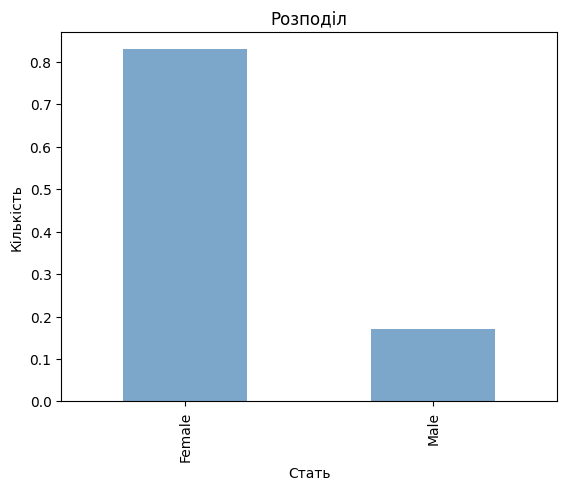

In [199]:
gender_counts = df.Gender.value_counts(normalize=True)
gender_counts.plot(kind='bar', color='steelblue', alpha=0.7)
plt.xlabel('Cтать')
plt.ylabel('Кількість')
plt.title('Розподіл')
plt.show()

In [200]:
average_age_by_gender = df.groupby('Gender')['Age'].mean()
display(average_age_by_gender)


Gender
Female    35.685429
Male      36.365913
Name: Age, dtype: float64

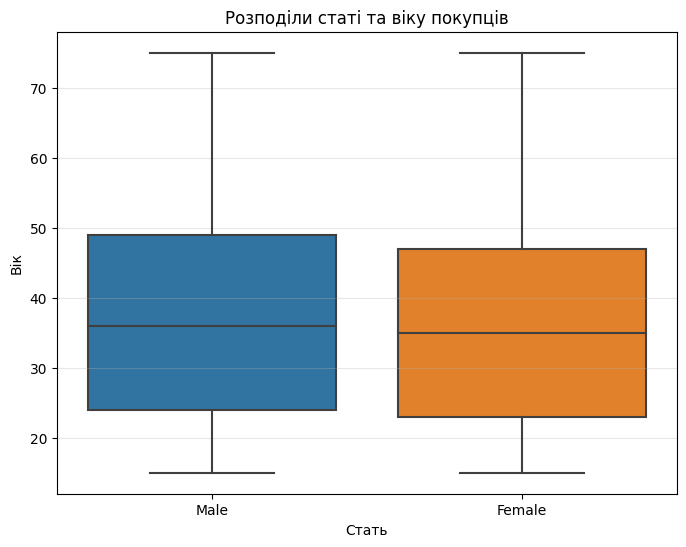

In [184]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Age', data=df)
plt.xlabel('Cтать')
plt.ylabel('Вік')
plt.title('Розподіли статі та віку покупців')
plt.grid(axis='y', alpha=0.3)
plt.show()


Бачимо що середній вік жінок та чоловіків приблизно однаковий. Але виходячи з попереднього графіку, жінки здійснюють більше покупок в магазинах з виборки.

Подивитись яка виручка в окремих категоріях у різних містах.

In [204]:

pivot = df.pivot_table(index='City', columns='Category', values='Profit Margin',aggfunc ='sum')
pivot_sorted = pivot.sum(axis=1).sort_values(ascending=False)

pivot


Category,Bakery & Breakfast,Beauty,Beverages,"Choco, Snacks, Sweets","Dairy, Chilled & Eggs",Frozen,Fruit & Vegetable,Health,Household,Kitchen & Dining,Meat & Seafood,Mother & Baby,Party Supplies,Pet Care,Rice & Cooking Essentials,"Wines, Beers & Spirits"
City,,,,,,,,,,,,,,,,
Bedok,1547.35443,1869.33409,561.69606,758.55337,635.47957,2075.24268,1261.43275,433.70618,428.08696,395.10865,917.47074,1080.99028,430.59114,1116.62958,274.83975,863.07952
Jakarta,1110.97992,1427.41745,442.80422,504.03239,492.71662,1810.10219,801.97055,288.37264,343.98665,291.04853,734.15862,780.15072,279.69858,841.60831,232.84367,686.70406
Kuala Lumpur,1353.53122,1785.27813,508.37646,618.40991,596.25491,2010.92800,878.18689,382.56013,414.93275,337.22202,953.75794,839.96332,257.13198,896.17630,290.85072,834.55466
Manila,1493.31282,1897.75151,574.34600,724.86912,611.90021,2120.67818,964.28604,412.43837,421.34368,391.96182,977.19762,1075.50897,500.64966,1092.95258,316.74686,879.69002
Woodlands,719.54291,1010.17185,321.99679,352.19164,332.38705,1244.16743,482.30357,258.40648,259.97779,196.30573,584.04562,485.12860,183.69666,517.88338,151.40924,389.68334


Яка середня прибутковість магазину за категорією товару?

Category
Bakery & Breakfast           0.919457
Beauty                       1.535053
Beverages                    1.091132
Choco, Snacks, Sweets        0.979813
Dairy, Chilled & Eggs        0.789334
Frozen                       1.448634
Fruit & Vegetable            1.004160
Health                       1.761393
Household                    0.993263
Kitchen & Dining             0.631523
Meat & Seafood               1.938869
Mother & Baby                2.064797
Party Supplies               0.899656
Pet Care                     1.288672
Rice & Cooking Essentials    0.520843
Wines, Beers & Spirits       2.131687
Name: Profit Margin, dtype: float64


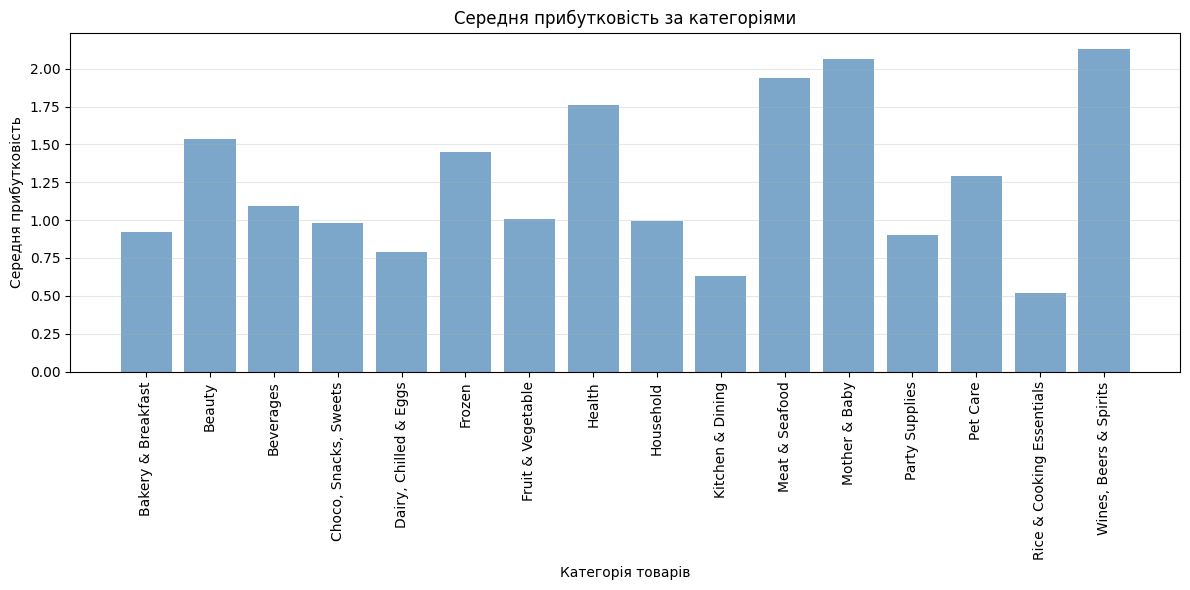

In [205]:
###Яка середня прибутковість магазину за категорією товару?
category_profitability = df.groupby('Category')['Profit Margin'].mean()
print(category_profitability)
categories = category_profitability.index
profitability = category_profitability.values
plt.figure(figsize=(12, 6))
plt.bar(categories, profitability, color='steelblue', alpha=0.7)
plt.xlabel('Категорія товарів')
plt.ylabel('Середня прибутковість')
plt.title('Середня прибутковість за категоріями')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Завдяки вирішенню питання ми бачимо що найменш прибуткова категорія товарів це Rice & Cooking Essentials. Але потрібно перевірити яка кількість продажів є за кожною категорією, бо можливо таке, що профіт з окремої продажі невеликий, проте самих продаж багато.

In [106]:
print (pd.options.display.max_columns)
print (pd.options.display.max_rows)

20
75


In [111]:
df.pivot_table(index='Category', values='QTY', aggfunc='count')

,QTY
Category,
Bakery & Breakfast,6770
Beauty,5205
Beverages,2208
"Choco, Snacks, Sweets",3019
"Dairy, Chilled & Eggs",3381
Frozen,6393
Fruit & Vegetable,4370
Health,1008
Household,1881


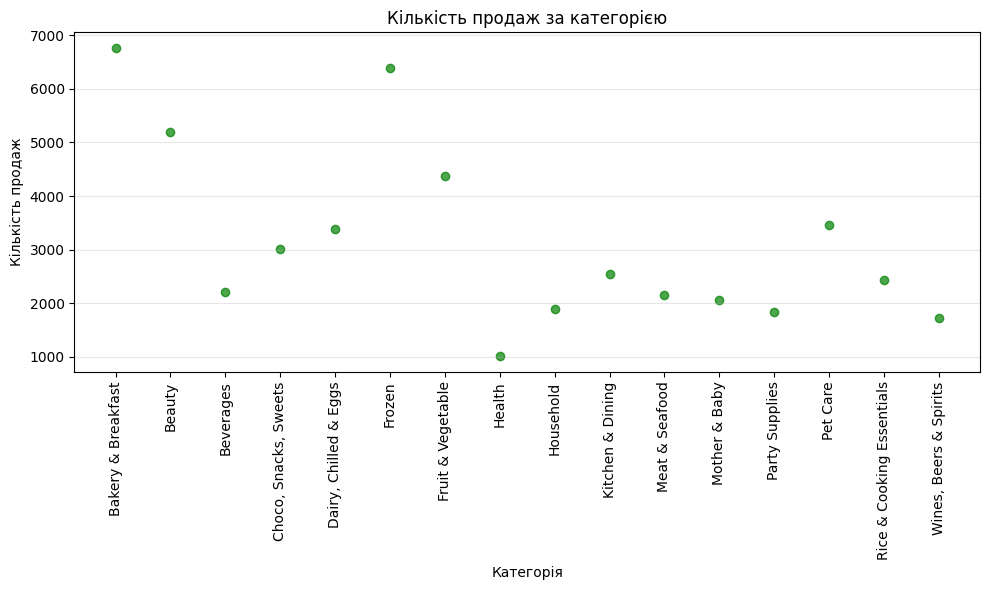

In [110]:
result = df.pivot_table(index='Category', values='QTY', aggfunc='count')
categories = result.index
quantity = result['QTY']
plt.figure(figsize=(10, 6))
plt.scatter(categories, quantity, color='green', alpha=0.7)
plt.xlabel('Категорія')
plt.ylabel('Кількість продаж')
plt.title('Кількість продаж за категорією')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Кількість продаж достатньо велика, на мій погляд, тому не будемо пропонувати прибрати цю категорію товару. 

In [ ]:
Порахувати прибуток магазінів у місті та середній чек.

In [134]:
city_net_profit = df.groupby('City')['Net Profit'].sum()
mean_city_net_profit = df.groupby('City')['Net Profit'].mean()
display(f'Прибуток магазинів:',city_net_profit, 'Cередній чек за містом', mean_city_net_profit)

'Прибуток магазинів:'

City
Bedok           844156.343232
Jakarta         662101.921690
Kuala Lumpur    752683.296086
Manila          875093.650504
Woodlands       430149.487558
Name: Net Profit, dtype: float64

'Cередній чек за містом'

City
Bedok           68.787186
Jakarta         72.694546
Kuala Lumpur    69.932481
Manila          70.686078
Woodlands       72.611325
Name: Net Profit, dtype: float64

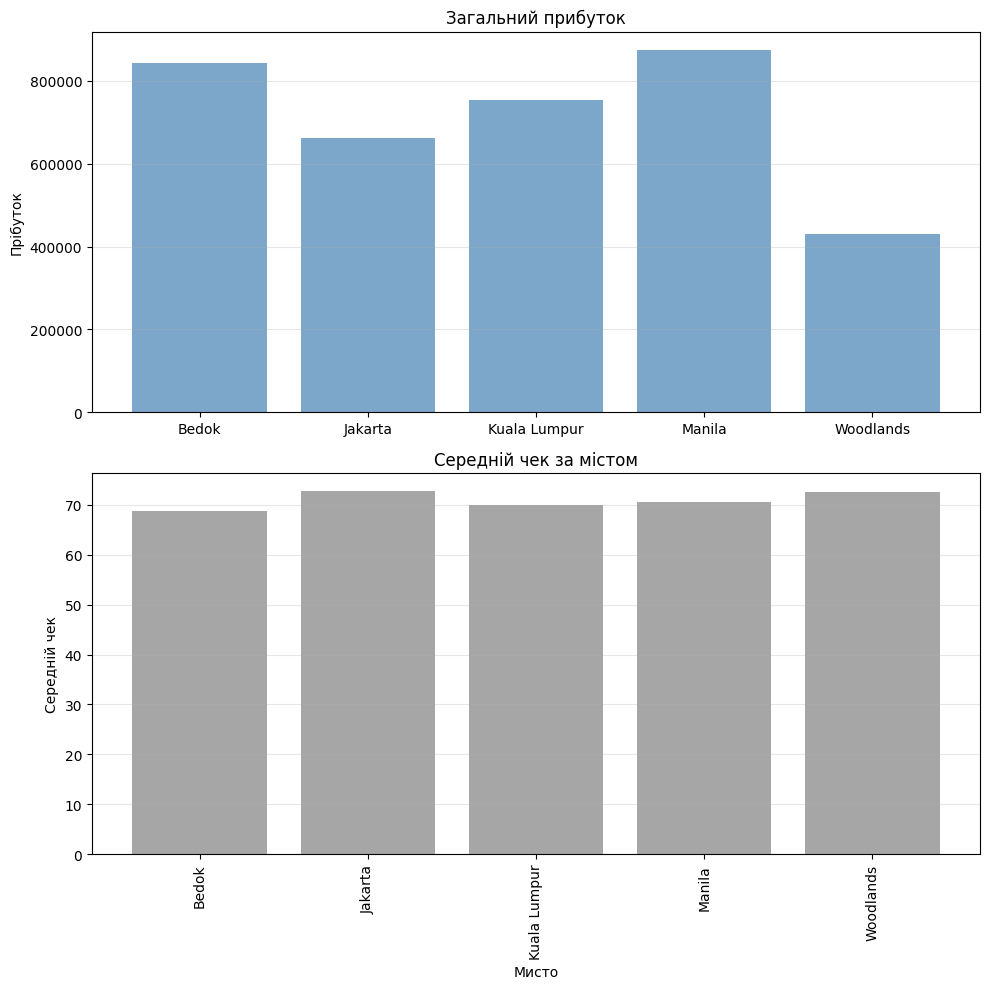

In [147]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
ax1.bar(city_net_profit.index, city_net_profit.values, color='steelblue', alpha=0.7)
ax1.set_ylabel('Прібуток')
ax1.set_title('Загальний прибуток')
ax1.grid(axis='y', alpha=0.3)
ax2.bar(mean_city_net_profit.index, mean_city_net_profit.values, color='grey', alpha=0.7)
ax2.set_xlabel('Мисто')
ax2.set_ylabel('Середній чек')
ax2.set_title('Середній чек за містом')
ax2.grid(axis='y', alpha=0.3)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [235]:
loyalty_purchase_counts = df.groupby(['Loyalty Card Points', 'Net Bill Amount']).size().reset_index(name='Count')
display(loyalty_purchase_counts)

,Loyalty Card Points,Net Bill Amount,Count
0,0,1.0176,1
1,0,1.0296,1
2,0,1.0379,1
3,0,1.2255,1
4,0,1.2375,1
...,...,...,...
41085,112,99.3280,1
41086,112,527.6680,2
41087,113,22.8000,1
41088,115,34.1925,1


Який був дохід у різні роки?

Year
2016     736961.0
2017     791862.0
2018     917032.0
2019    1118330.0
Name: Net Profit, dtype: float64

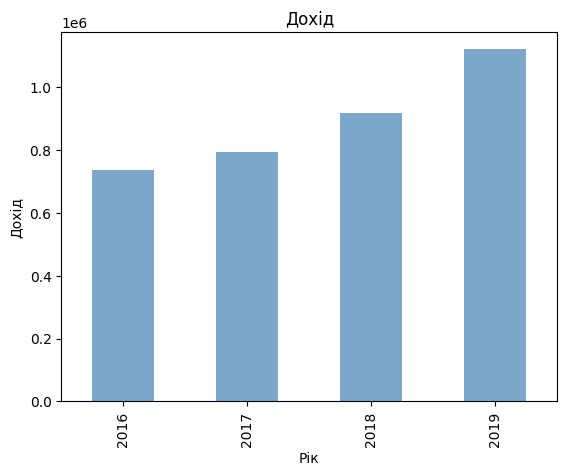

In [275]:
income_by_year = df.groupby('Year')['Net Profit'].sum().round(0)
display(income_by_year)


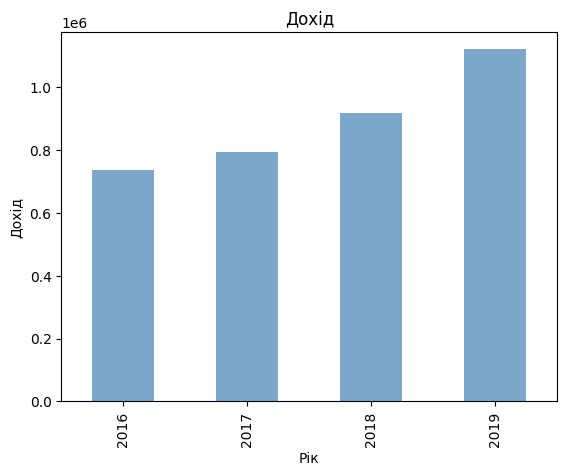

In [276]:
income_by_year.plot(kind='bar', color='steelblue', alpha=0.7)
plt.xlabel('Рік')
plt.ylabel('Дохід')
plt.title('Дохід')
plt.show()